# Feature Engineering

---

## 1. Introduction

- Explain the purpose of this notebook.
- Briefly list the new features you plan to create.

## 2. Loading and Preparing Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned data
logistics_df = pd.read_csv('../data/raw/logistics_df.csv')
logistics_df.head()

,Route ID,Delivery Time (hours),Date,Fuel Costs (USD),Delivery Start Time,Distance Traveled (miles),Estimated Distance (miles),Weather Conditions,Traffic Conditions,Driver Ratings,...,Cost per Gallon (USD),Total Fuel Cost (USD),Insurance Costs (USD),Breakdown Repair Costs (USD),Overtime Labor Costs (USD),Fuel Surcharge (USD),Idle Cost (USD),Total Operational Cost (USD),Fuel Cost per Mile,Delivery Efficiency Score
0,89273afc-bd2f-41ed-a73d-ef0b92913719,6.834667,2023-06-19,860.972014,10:21:08,2600.678278,1347.343378,Light Rain,Severe,2.990486,...,3.5,1697.019217,96.922976,660.421071,0.0,75.199379,0.219246,1729.539837,0.331057,0.040278
1,78800389-d0f5-41e7-9ab3-4401f6c25c32,5.090882,2023-02-24,847.397208,06:44:56,1493.396998,1610.912518,Clear,Moderate,1.243085,...,3.5,974.485550,33.181200,0.000000,0.0,74.013722,1.420456,1000.309343,0.567429,0.041070
2,cc5a94e9-d53b-4d84-ba13-19d045c00e21,5.179179,2023-02-12,368.294777,16:45:48,495.929796,585.832494,Clear,Severe,1.334854,...,3.5,323.608806,56.347931,0.000000,0.0,32.167757,2.569551,463.841459,0.742635,0.013087
3,36b33d73-1c8e-4782-9775-84def74b3cd0,3.271822,2023-09-23,740.660213,01:47:40,2518.656016,2720.531979,Heavy Rain,Moderate,4.355089,...,3.5,1643.497273,87.362167,0.000000,0.0,64.691055,1.144174,960.391265,0.294070,0.054048
4,1139533f-4a9f-4348-b05c-10a55d768e04,7.007333,2023-06-20,323.146483,13:03:09,2466.773297,1489.795422,Clear,Severe,2.618140,...,3.0,1379.693375,26.073320,0.000000,0.0,28.224396,0.813373,442.445597,0.131000,0.036246


In [3]:
# Create Cost per Mile
logistics_df['Cost per Mile'] = logistics_df['Fuel Costs (USD)'] / logistics_df['Distance Traveled (miles)']


In [4]:
# Create Delivery Efficiency feature
logistics_df['Delivery Efficiency'] = logistics_df['Distance Traveled (miles)'] / logistics_df['Delivery Time (hours)']


In [5]:
# Create Route Length Category based on distance
conditions = [
    (logistics_df['Distance Traveled (miles)'] < 100),
    (logistics_df['Distance Traveled (miles)'] >= 100) & (logistics_df['Distance Traveled (miles)'] < 300),
    (logistics_df['Distance Traveled (miles)'] >= 300)
]
categories = ['Short', 'Medium', 'Long']
logistics_df['Route Length Category'] = np.select(conditions, categories)


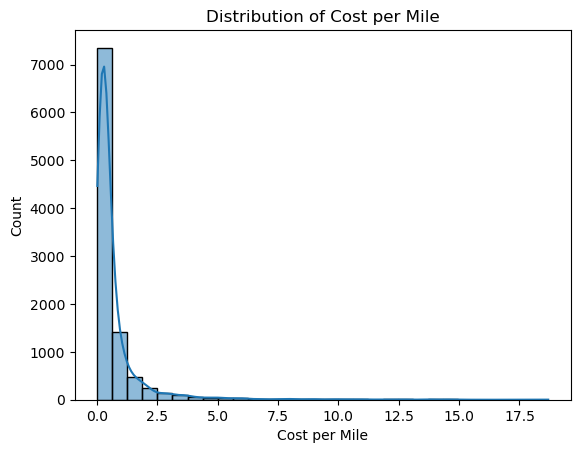

In [7]:
sns.histplot(logistics_df['Cost per Mile'], bins=30, kde=True)
plt.title("Distribution of Cost per Mile")
plt.show()


In [8]:
# Save the engineered data
logistics_df.to_csv('../data/processed/engineered_data.csv', index=False)
